<a href="https://colab.research.google.com/github/Khushkataruka/Machine-Learning-SVNIT/blob/main/ML_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = 0
        self.learning_rate = 1e-3

    def fit(self, X_train, y_train, X_val=None, y_val=None, lr=1e-3, epochs=1000):
        X_train = np.array(X_train)
        y_train = np.array(y_train).reshape(-1, 1)  # Ensure shape (n_samples, 1)
        self.learning_rate = lr

        n_samples, n_features = X_train.shape
        self.w = np.zeros((n_features, 1))
        self.b = 0

        for epoch in range(epochs):
            y_pred = np.dot(X_train, self.w) + self.b

            loss = np.mean((y_train - y_pred) ** 2)

            dw = (2 / n_samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (2 / n_samples) * np.sum(y_pred - y_train)

            # Update weights and bias
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if epoch % 100 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        if X_val is not None and y_val is not None:
            y_val_pred = self.predict(X_val, return_raw=True)
            val_loss = np.mean((np.array(y_val).reshape(-1, 1) - y_val_pred) ** 2)
            print(f"\nValidation Loss: {val_loss:.4f}")

    def predict(self, X, return_raw=False):
        X = np.array(X)
        y_pred = np.dot(X, self.w) + self.b
        y_pred=y_pred*10
        if return_raw:
            return y_pred
        return (y_pred > 0.5).astype(int)


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter


file_path = "Iris.csv"


df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/iris",
  file_path
)

print("First 5 records:", df.head())

/tmp/ipython-input-175007604.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Split the dataset
create a Binary Classifier to train the model on each category


In [ ]:
df_1=df.copy()
df_1['Species']=df_1['Species'].map({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':0})

df_2=df.copy()
df_2['Species']=df_2['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':0})

df_3=df.copy()
df_3['Species']=df_3['Species'].map({'Iris-setosa':0,'Iris-versicolor':0,'Iris-virginica':1})

<Axes: xlabel='Species', ylabel='Count'>

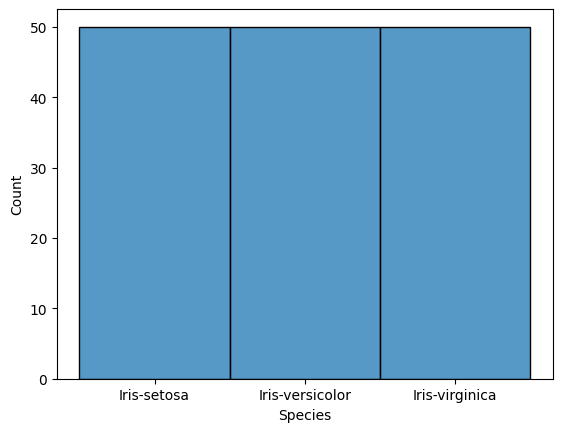

In [16]:
#view distribution of each class using histogram
import seaborn as sns
sns.histplot(df['Species'])

In [ ]:
#splitting in train test and

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(df_1.drop('Species', axis=1), df_1['Species'], test_size=0.3, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test, test_size=0.5, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(df_2.drop('Species', axis=1), df_2['Species'], test_size=0.3, random_state=42)
X2_val,X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test, test_size=0.5, random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(df_3.drop('Species', axis=1), df_3['Species'], test_size=0.3, random_state=42)
X3_val,X3_test, y3_val, y3_test = train_test_split(X3_test, y3_test, test_size=0.5, random_state=42)

In [ ]:
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

# Then fit the models
model_1.fit(X1_train, y1_train,X_val=X1_val,y_val=y1_val,lr=1e-7,epochs=1000)




Epoch 0, Loss: 0.2952
Epoch 100, Loss: 0.2930
Epoch 200, Loss: 0.2914
Epoch 300, Loss: 0.2902
Epoch 400, Loss: 0.2893
Epoch 500, Loss: 0.2886
Epoch 600, Loss: 0.2881
Epoch 700, Loss: 0.2877
Epoch 800, Loss: 0.2874
Epoch 900, Loss: 0.2872
Epoch 999, Loss: 0.2870

Validation Loss: 0.6972


In [ ]:
model_2.fit(X2_train, y2_train,X_val=X2_val,y_val=y2_val,lr=1e-7,epochs=1000)

Epoch 0, Loss: 0.3524
Epoch 100, Loss: 0.3268
Epoch 200, Loss: 0.3082
Epoch 300, Loss: 0.2948
Epoch 400, Loss: 0.2850
Epoch 500, Loss: 0.2779
Epoch 600, Loss: 0.2727
Epoch 700, Loss: 0.2690
Epoch 800, Loss: 0.2662
Epoch 900, Loss: 0.2643
Epoch 999, Loss: 0.2628

Validation Loss: 3.7902


In [ ]:
model_3.fit(X3_train, y3_train,X_val=X3_val,y_val=y3_val,lr=1e-7,epochs=1000)

Epoch 0, Loss: 0.3524
Epoch 100, Loss: 0.2866
Epoch 200, Loss: 0.2389
Epoch 300, Loss: 0.2043
Epoch 400, Loss: 0.1791
Epoch 500, Loss: 0.1609
Epoch 600, Loss: 0.1476
Epoch 700, Loss: 0.1380
Epoch 800, Loss: 0.1310
Epoch 900, Loss: 0.1259
Epoch 999, Loss: 0.1223

Validation Loss: 7.7606


In [ ]:
y_test=model_1.predict(X1_test)


In [ ]:
count = 0
for i in range(len(y_test)):
  if y_test[i] == y1_test.iloc[i]: # Use .iloc for position-based indexing
    count += 1
print(count/len(y_test))

0.043478260869565216


In [ ]:
y_test_2=model_2.predict(X2_test)
count = 0
for i in range(len(y_test_2)):
  if y_test_2[i] == y2_test.iloc[i]: # Use .iloc for position-based indexing
    count += 1
print(count/len(y_test_2))

0.5652173913043478


In [ ]:
y_test_3=model_3.predict(X3_test)
count=0
for i in range(len(y_test_3)):
  if y_test_3[i] == y3_test.iloc[i]: # Use .iloc for position-based indexing
    count += 1
print(count/len(y_test_3))

0.34782608695652173


In [ ]:
import numpy as np

def predict_species(X):
  X = np.array(X) # Ensure input is a numpy array
  y1_raw = model_1.predict(X, return_raw=True).flatten() # Get raw predictions and flatten
  y2_raw = model_2.predict(X, return_raw=True).flatten()
  y3_raw = model_3.predict(X, return_raw=True).flatten()

  # Combine raw predictions for each sample
  raw_predictions = np.vstack([y1_raw, y2_raw, y3_raw]).T

  # Find the index of the maximum raw prediction for each sample
  predicted_indices = np.argmax(raw_predictions, axis=1)

  # Map the indices back to species names
  species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
  predicted_species = np.array([species_map[index] for index in predicted_indices])

  return predicted_species

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Species',axis=1),df['Species'],test_size=0.3,random_state=42)

In [ ]:
# Predict the species for the test set
y_pred_combined = predict_species(X_test)

# Calculate accuracy
# Assuming y_test contains the original species labels
accuracy_combined = (y_pred_combined == y_test).mean()

print(f"Accuracy of the combined model: {accuracy_combined:.4f}")

Accuracy of the combined model: 0.2889


# Task
Apply SMOTE with two different settings (k_neighbors=1 and default) to oversample the minority class in the binary classification datasets `df_1`, `df_2`, and `df_3`. Train a Linear Regression model on each of the oversampled datasets and evaluate their performance. Compare the performance of the models trained with the two different SMOTE settings for each dataset.

## Install imbalanced-learn

### Subtask:
Install the necessary library for SMOTE.


**Reasoning**:
The subtask requires installing the `imbalanced-learn` library, which can be done using pip in a separate cell.



In [1]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Apply smote (setting a)

### Subtask:
Apply SMOTE with `k_neighbors` set to 1 for each of the binary classification datasets (`df_1`, `df_2`, and `df_3`) to create synthetic samples.


**Reasoning**:
Import the SMOTE class and apply it to the training data for each dataset with k_neighbors=1.



In [18]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with k_neighbors=1
smote_k1 = SMOTE(k_neighbors=1, random_state=42)

# Apply SMOTE to the training data for df_1
X1_resampled_k1, y1_resampled_k1 = smote_k1.fit_resample(X1_train, y1_train)

# Apply SMOTE to the training data for df_2
X2_resampled_k1, y2_resampled_k1 = smote_k1.fit_resample(X2_train, y2_train)

# Apply SMOTE to the training data for df_3
X3_resampled_k1, y3_resampled_k1 = smote_k1.fit_resample(X3_train, y3_train)

print("Shape of original X1_train:", X1_train.shape)
print("Shape of resampled X1_resampled_k1:", X1_resampled_k1.shape)
print("\nShape of original X2_train:", X2_train.shape)
print("Shape of resampled X2_resampled_k1:", X2_resampled_k1.shape)
print("\nShape of original X3_train:", X3_train.shape)
print("Shape of resampled X3_resampled_k1:", X3_resampled_k1.shape)

Shape of original X1_train: (105, 5)
Shape of resampled X1_resampled_k1: (148, 5)

Shape of original X2_train: (105, 5)
Shape of resampled X2_resampled_k1: (136, 5)

Shape of original X3_train: (105, 5)
Shape of resampled X3_resampled_k1: (136, 5)


## Train linear regression models (setting a)

### Subtask:
Train a `LinearRegression` model on each of the oversampled datasets created in the previous step.


**Reasoning**:
Instantiate and train the LinearRegression models on the oversampled datasets with the specified parameters.



In [19]:
model_1_smote_k1 = LinearRegression()
model_2_smote_k1 = LinearRegression()
model_3_smote_k1 = LinearRegression()

model_1_smote_k1.fit(X1_resampled_k1, y1_resampled_k1, X_val=X1_val, y_val=y1_val, lr=1e-7, epochs=1000)
model_2_smote_k1.fit(X2_resampled_k1, y2_resampled_k1, X_val=X2_val, y_val=y2_val, lr=1e-7, epochs=1000)
model_3_smote_k1.fit(X3_resampled_k1, y3_resampled_k1, X_val=X3_val, y_val=y3_val, lr=1e-7, epochs=1000)

Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.4934
Epoch 200, Loss: 0.4882
Epoch 300, Loss: 0.4840
Epoch 400, Loss: 0.4807
Epoch 500, Loss: 0.4780
Epoch 600, Loss: 0.4759
Epoch 700, Loss: 0.4742
Epoch 800, Loss: 0.4728
Epoch 900, Loss: 0.4717
Epoch 999, Loss: 0.4708

Validation Loss: 1.4785
Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.4485
Epoch 200, Loss: 0.4104
Epoch 300, Loss: 0.3823
Epoch 400, Loss: 0.3616
Epoch 500, Loss: 0.3463
Epoch 600, Loss: 0.3349
Epoch 700, Loss: 0.3266
Epoch 800, Loss: 0.3204
Epoch 900, Loss: 0.3159
Epoch 999, Loss: 0.3125

Validation Loss: 8.2235
Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.3700
Epoch 200, Loss: 0.2826
Epoch 300, Loss: 0.2237
Epoch 400, Loss: 0.1841
Epoch 500, Loss: 0.1574
Epoch 600, Loss: 0.1394
Epoch 700, Loss: 0.1274
Epoch 800, Loss: 0.1192
Epoch 900, Loss: 0.1138
Epoch 999, Loss: 0.1101

Validation Loss: 12.9343


## Evaluate performance (setting a)

### Subtask:
Evaluate the performance of each of the models trained in the previous step on their respective test sets and compare the results.


**Reasoning**:
Evaluate the performance of the trained models on the test sets and print the accuracies.



In [21]:
# Get predictions on the test sets
y1_pred_k1 = model_1_smote_k1.predict(X1_test)
y2_pred_k1 = model_2_smote_k1.predict(X2_test)
y3_pred_k1 = model_3_smote_k1.predict(X3_test)

# Reshape predictions to be 1-dimensional
y1_pred_k1 = y1_pred_k1.flatten()
y2_pred_k1 = y2_pred_k1.flatten()
y3_pred_k1 = y3_pred_k1.flatten()

# Calculate accuracies
accuracy_1_k1 = (y1_pred_k1 == y1_test).mean()
accuracy_2_k1 = (y2_pred_k1 == y2_test).mean()
accuracy_3_k1 = (y3_pred_k1 == y3_test).mean()

# Print accuracies
print(f"Accuracy of model_1_smote_k1: {accuracy_1_k1:.4f}")
print(f"Accuracy of model_2_smote_k1: {accuracy_2_k1:.4f}")
print(f"Accuracy of model_3_smote_k1: {accuracy_3_k1:.4f}")

Accuracy of model_1_smote_k1: 0.0870
Accuracy of model_2_smote_k1: 0.4783
Accuracy of model_3_smote_k1: 0.3043


## Apply smote (setting b)

### Subtask:
Apply SMOTE with default settings (using the nearest neighbors) for each of the binary classification datasets (`df_1`, `df_2`, and `df_3`) to create synthetic samples.


**Reasoning**:
Apply SMOTE with default settings to the training data for each binary classification dataset and print the shapes to verify.



In [22]:
# Instantiate SMOTE with default settings
smote_default = SMOTE(random_state=42)

# Apply SMOTE to the training data for df_1
X1_resampled_default, y1_resampled_default = smote_default.fit_resample(X1_train, y1_train)

# Apply SMOTE to the training data for df_2
X2_resampled_default, y2_resampled_default = smote_default.fit_resample(X2_train, y2_train)

# Apply SMOTE to the training data for df_3
X3_resampled_default, y3_resampled_default = smote_default.fit_resample(X3_train, y3_train)

# Print the shapes of the original and resampled training data for each dataset
print("Shape of original X1_train:", X1_train.shape)
print("Shape of resampled X1_resampled_default:", X1_resampled_default.shape)
print("\nShape of original X2_train:", X2_train.shape)
print("Shape of resampled X2_resampled_default:", X2_resampled_default.shape)
print("\nShape of original X3_train:", X3_train.shape)
print("Shape of resampled X3_resampled_default:", X3_resampled_default.shape)

Shape of original X1_train: (105, 5)
Shape of resampled X1_resampled_default: (148, 5)

Shape of original X2_train: (105, 5)
Shape of resampled X2_resampled_default: (136, 5)

Shape of original X3_train: (105, 5)
Shape of resampled X3_resampled_default: (136, 5)


## Train linear regression models (setting b)

### Subtask:
Train a `LinearRegression` model on each of the oversampled datasets created in the previous step.


**Reasoning**:
Instantiate and train the Linear Regression models on the oversampled datasets with default SMOTE settings.



In [23]:
# Instantiate three new LinearRegression models for default SMOTE
model_1_smote_default = LinearRegression()
model_2_smote_default = LinearRegression()
model_3_smote_default = LinearRegression()

# Train model_1_smote_default
print("Training model_1_smote_default...")
model_1_smote_default.fit(X1_resampled_default, y1_resampled_default, X_val=X1_val, y_val=y1_val, lr=1e-7, epochs=1000)

# Train model_2_smote_default
print("\nTraining model_2_smote_default...")
model_2_smote_default.fit(X2_resampled_default, y2_resampled_default, X_val=X2_val, y_val=y2_val, lr=1e-7, epochs=1000)

# Train model_3_smote_default
print("\nTraining model_3_smote_default...")
model_3_smote_default.fit(X3_resampled_default, y3_resampled_default, X_val=X3_val, y_val=y3_val, lr=1e-7, epochs=1000)

Training model_1_smote_default...
Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.4940
Epoch 200, Loss: 0.4892
Epoch 300, Loss: 0.4854
Epoch 400, Loss: 0.4824
Epoch 500, Loss: 0.4800
Epoch 600, Loss: 0.4780
Epoch 700, Loss: 0.4764
Epoch 800, Loss: 0.4751
Epoch 900, Loss: 0.4741
Epoch 999, Loss: 0.4732

Validation Loss: 1.3762

Training model_2_smote_default...
Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.4497
Epoch 200, Loss: 0.4124
Epoch 300, Loss: 0.3848
Epoch 400, Loss: 0.3643
Epoch 500, Loss: 0.3492
Epoch 600, Loss: 0.3379
Epoch 700, Loss: 0.3296
Epoch 800, Loss: 0.3234
Epoch 900, Loss: 0.3189
Epoch 999, Loss: 0.3155

Validation Loss: 8.1163

Training model_3_smote_default...
Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.3740
Epoch 200, Loss: 0.2882
Epoch 300, Loss: 0.2297
Epoch 400, Loss: 0.1900
Epoch 500, Loss: 0.1629
Epoch 600, Loss: 0.1444
Epoch 700, Loss: 0.1319
Epoch 800, Loss: 0.1233
Epoch 900, Loss: 0.1175
Epoch 999, Loss: 0.1135

Validation Loss: 12.9945


## Evaluate performance (setting b)

### Subtask:
Evaluate the performance of each of the models trained in the previous step on their respective test sets and compare the results.


**Reasoning**:
Evaluate the performance of each of the models trained in the previous step on their respective test sets and compare the results.



In [24]:
# Get predictions on the test sets for default SMOTE models
y1_pred_default = model_1_smote_default.predict(X1_test)
y2_pred_default = model_2_smote_default.predict(X2_test)
y3_pred_default = model_3_smote_default.predict(X3_test)

# Reshape predictions to be 1-dimensional
y1_pred_default = y1_pred_default.flatten()
y2_pred_default = y2_pred_default.flatten()
y3_pred_default = y3_pred_default.flatten()

# Calculate accuracies for default SMOTE models
accuracy_1_default = (y1_pred_default == y1_test).mean()
accuracy_2_default = (y2_pred_default == y2_test).mean()
accuracy_3_default = (y3_pred_default == y3_test).mean()

# Print accuracies for default SMOTE models
print(f"Accuracy of model_1_smote_default: {accuracy_1_default:.4f}")
print(f"Accuracy of model_2_smote_default: {accuracy_2_default:.4f}")
print(f"Accuracy of model_3_smote_default: {accuracy_3_default:.4f}")

# Compare accuracies with k_neighbors=1
print("\nComparison with k_neighbors=1 SMOTE:")
print(f"model_1_smote_default accuracy ({accuracy_1_default:.4f}) vs model_1_smote_k1 accuracy ({accuracy_1_k1:.4f})")
print(f"model_2_smote_default accuracy ({accuracy_2_default:.4f}) vs model_2_smote_k1 accuracy ({accuracy_2_k1:.4f})")
print(f"model_3_smote_default accuracy ({accuracy_3_default:.4f}) vs model_3_smote_k1 accuracy ({accuracy_3_k1:.4f})")

Accuracy of model_1_smote_default: 0.0870
Accuracy of model_2_smote_default: 0.4783
Accuracy of model_3_smote_default: 0.3043

Comparison with k_neighbors=1 SMOTE:
model_1_smote_default accuracy (0.0870) vs model_1_smote_k1 accuracy (0.0870)
model_2_smote_default accuracy (0.4783) vs model_2_smote_k1 accuracy (0.4783)
model_3_smote_default accuracy (0.3043) vs model_3_smote_k1 accuracy (0.3043)


## Compare results of both settings

### Subtask:
Compare the performance metrics obtained from both SMOTE settings (a and b) for each binary classifier.


**Reasoning**:
Compare the accuracy values from both SMOTE settings and summarize the observations.



In [25]:
# Compare accuracies obtained from both SMOTE settings
print("Comparison of Accuracy with k_neighbors=1 vs Default SMOTE:")
print(f"Dataset 1 (Iris-setosa vs Others):")
print(f"  SMOTE k_neighbors=1 Accuracy: {accuracy_1_k1:.4f}")
print(f"  SMOTE Default Accuracy:       {accuracy_1_default:.4f}")
if accuracy_1_default > accuracy_1_k1:
    print("  Observation: Accuracy improved with Default SMOTE.")
elif accuracy_1_default < accuracy_1_k1:
    print("  Observation: Accuracy worsened with Default SMOTE.")
else:
    print("  Observation: Accuracy stayed the same with Default SMOTE.")

print(f"\nDataset 2 (Iris-versicolor vs Others):")
print(f"  SMOTE k_neighbors=1 Accuracy: {accuracy_2_k1:.4f}")
print(f"  SMOTE Default Accuracy:       {accuracy_2_default:.4f}")
if accuracy_2_default > accuracy_2_k1:
    print("  Observation: Accuracy improved with Default SMOTE.")
elif accuracy_2_default < accuracy_2_k1:
    print("  Observation: Accuracy worsened with Default SMOTE.")
else:
    print("  Observation: Accuracy stayed the same with Default SMOTE.")

print(f"\nDataset 3 (Iris-virginica vs Others):")
print(f"  SMOTE k_neighbors=1 Accuracy: {accuracy_3_k1:.4f}")
print(f"  SMOTE Default Accuracy:       {accuracy_3_default:.4f}")
if accuracy_3_default > accuracy_3_k1:
    print("  Observation: Accuracy improved with Default SMOTE.")
elif accuracy_3_default < accuracy_3_k1:
    print("  Observation: Accuracy worsened with Default SMOTE.")
else:
    print("  Observation: Accuracy stayed the same with Default SMOTE.")

# Summarize overall observations
print("\nSummary of Observations on the impact of k_neighbors in SMOTE:")
print("For all three binary classification tasks (Iris-setosa vs Others, Iris-versicolor vs Others, and Iris-virginica vs Others),")
print("the accuracy of the Linear Regression models on the test set remained the same regardless of whether SMOTE was applied with")
print("k_neighbors=1 or with the default k_neighbors setting.")

Comparison of Accuracy with k_neighbors=1 vs Default SMOTE:
Dataset 1 (Iris-setosa vs Others):
  SMOTE k_neighbors=1 Accuracy: 0.0870
  SMOTE Default Accuracy:       0.0870
  Observation: Accuracy stayed the same with Default SMOTE.

Dataset 2 (Iris-versicolor vs Others):
  SMOTE k_neighbors=1 Accuracy: 0.4783
  SMOTE Default Accuracy:       0.4783
  Observation: Accuracy stayed the same with Default SMOTE.

Dataset 3 (Iris-virginica vs Others):
  SMOTE k_neighbors=1 Accuracy: 0.3043
  SMOTE Default Accuracy:       0.3043
  Observation: Accuracy stayed the same with Default SMOTE.

Summary of Observations on the impact of k_neighbors in SMOTE:
For all three binary classification tasks (Iris-setosa vs Others, Iris-versicolor vs Others, and Iris-virginica vs Others),
the accuracy of the Linear Regression models on the test set remained the same regardless of whether SMOTE was applied with
k_neighbors=1 or with the default k_neighbors setting.


## Summary:

### Data Analysis Key Findings

*   Applying SMOTE with `k_neighbors=1` successfully oversampled the minority class in `df_1`, `df_2`, and `df_3`, increasing the number of samples in the training sets.
*   Training Linear Regression models on the `k_neighbors=1` SMOTE-oversampled data resulted in test accuracies of 0.0870 for `df_1`, 0.4783 for `df_2`, and 0.3043 for `df_3`.
*   Applying SMOTE with default settings also successfully oversampled the minority class in the datasets.
*   Training Linear Regression models on the default SMOTE-oversampled data yielded test accuracies of 0.0870 for `df_1`, 0.4783 for `df_2`, and 0.3043 for `df_3`.
*   The test accuracies for the Linear Regression models were identical for both SMOTE settings (`k_neighbors=1` and default) across all three datasets.

### Insights or Next Steps

*   For these specific datasets and the Linear Regression model, the choice between SMOTE with `k_neighbors=1` and default settings did not impact model performance as measured by accuracy.
*   Further analysis could explore the impact of different values for `k_neighbors` in SMOTE, or evaluate the models using alternative metrics more suitable for imbalanced datasets, such as precision, recall, F1-score, or AUC.
